In [1]:
# Developing a machine learning model for image classfication using CNN.

## importing libraries
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

In [2]:
## Initializing the CNN Model
np.random.seed(1337)
classifier = Sequential()

classifier.add(Convolution2D(32, 3, 3, input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(16, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(8, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), padding='same'))



classifier.add(Flatten())

In [3]:
#hidden layer
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dropout(0.5))

#output layer
classifier.add(Dense(10, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(classifier.summary())
#plot_model(classifier, show_shapes=True, to_file='PlantVillage_CNN.png')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 42, 42, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 16)          4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 8)           1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 8)          0

In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'train',
        target_size=(128, 128),
        batch_size=64,
        class_mode='categorical' )
label_map = (training_set.class_indices)

print(label_map)

test_set = test_datagen.flow_from_directory(
        'val',
        target_size=(128, 128),
        batch_size=64,
        class_mode='categorical')

train_batch_size = 128
val_batch_size = 128
num_epochs = 70
train_images = 10000
val_images = 1000


history=classifier.fit(
        training_set,
        steps_per_epoch=train_images // train_batch_size,
        epochs=num_epochs, 
        validation_data=test_set,
        validation_steps=val_images // val_batch_size)

classifier.save_weights('test.h5')
print('Saved trained model as %s ' % 'test.h5')

Found 10000 images belonging to 10 classes.
{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}
Found 1000 images belonging to 10 classes.
Epoch 1/70
78/78 [==============================] - 31s 398ms/step - loss: 0.4877 - accuracy: 0.8220 - val_loss: 0.4769 - val_accuracy: 0.8237
Epoch 2/70
78/78 [==============================] - 32s 406ms/step - loss: 0.5446 - accuracy: 0.8043 - val_loss: 0.4920 - val_accuracy: 0.8103
Epoch 3/70
78/78 [==============================] - 31s 391ms/step - loss: 0.4725 - accuracy: 0.8250 - val_loss: 0.4840 - val_accuracy: 0.8281
Epoch 4/70
78/78 [==============================] - 31s 397ms/step - loss: 0.4751 - accuracy: 0.8281 - val_loss: 0.5754 - val_accuracy: 0.7879
Epoch 5/70
78/

78/78 [==============================] - 35s 442ms/step - loss: 0.4340 - accuracy: 0.8454 - val_loss: 0.4568 - val_accuracy: 0.8393
Epoch 56/70
78/78 [==============================] - 32s 405ms/step - loss: 0.4299 - accuracy: 0.8451 - val_loss: 0.4829 - val_accuracy: 0.8304
Epoch 57/70
78/78 [==============================] - 32s 407ms/step - loss: 0.3989 - accuracy: 0.8544 - val_loss: 0.4202 - val_accuracy: 0.8504
Epoch 58/70
78/78 [==============================] - 33s 419ms/step - loss: 0.4455 - accuracy: 0.8362 - val_loss: 0.4946 - val_accuracy: 0.8237
Epoch 59/70
78/78 [==============================] - 34s 433ms/step - loss: 0.4199 - accuracy: 0.8523 - val_loss: 0.5964 - val_accuracy: 0.7946
Epoch 60/70
78/78 [==============================] - 32s 406ms/step - loss: 0.4469 - accuracy: 0.8401 - val_loss: 0.5456 - val_accuracy: 0.7946
Epoch 61/70
78/78 [==============================] - 32s 416ms/step - loss: 0.4319 - accuracy: 0.8467 - val_loss: 0.3800 - val_accuracy: 0.8661
Epoc

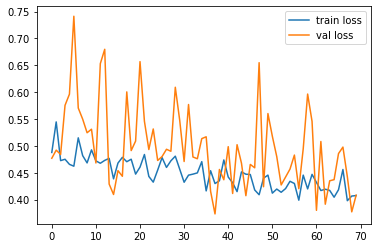

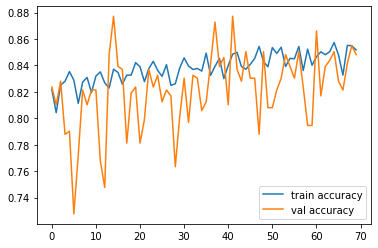

<Figure size 432x288 with 0 Axes>

In [26]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Loss over Epochs')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy over Epochs')

In [27]:
score=classifier.evaluate(test_set)

16/16 [==============================] - 2s 129ms/step - loss: 0.4101 - accuracy: 0.8530


In [29]:
score

[0.4100538194179535, 0.8529999852180481]